我们用包含在另一个流对象中的stream结束了第四章，让我们再创建这个类

In [1]:
from music21 import *

note1 = note.Note("C4")
note1.duration.type = 'half'
note2 = note.Note("F#4")
note3 = note.Note("B-2")

stream1 = stream.Stream()
stream1.id = 'some notes'
stream1.append(note1)
stream1.append(note2)
stream1.append(note3)

biggerStream = stream.Stream()
note2 = note.Note("D#5")
biggerStream.insert(0, note2)
biggerStream.append(stream1)

到目前为止，我们学过的用来展示流的内容的模块就是`show()`了

In [2]:
biggerStream.show('text')

{0.0} <music21.note.Note D#>
{1.0} <music21.stream.Stream some notes>
    {0.0} <music21.note.Note C>
    {2.0} <music21.note.Note F#>
    {3.0} <music21.note.Note B->


如第四章所说，stream和列表很像，我们可以通过[1][1]的方式来方位到第二个流，但在music里面有更一般的方法
### 类和子类
诸如音符或音高之类的对象基本上是信息的集合以及可以对该信息执行的一些操作。类是可以创建某种特定类型新对象的东西（有时称为工厂）。我们已经看到了诸如note.Noteclass之类的类，其中小写字母note是该类所在的“模块” Note：

In [3]:
note

<module 'music21.note' from 'd:\\program files\\python\\python35\\lib\\site-packages\\music21\\note.py'>

In [4]:
print(note.Note)

<class 'music21.note.Note'>


对于Python中的任何类，您都可以使用该函数help(Class)来查找其功能:

In [5]:
help(note.Note)

Help on class Note in module music21.note:

class Note(NotRest)
 |  One of the most important music21 classes, a Note
 |  stores a single note (that is, not a rest or an unpitched element)
 |  that can be represented by one or more notational units -- so
 |  for instance a C quarter-note and a D# eighth-tied-to-32nd are both
 |  a single Note object.
 |  
 |  
 |  A Note knows both its total duration and how to express itself as a set of
 |  tied notes of different lengths. For instance, a note of 2.5 quarters in
 |  length could be half tied to eighth or dotted quarter tied to quarter.
 |  
 |  
 |  The first argument to the Note is the pitch name (with or without
 |  octave, see the introduction to :class:`music21.pitch.Pitch`).
 |  Further arguments can be specified as keywords (such as type, dots, etc.)
 |  and are passed to the underlying :class:`music21.duration.Duration` element.
 |  
 |  
 |  Two notes are considered equal if their most important attributes
 |  (such as pitch, 

我们可以看到Note是NotRest的子类，这意味着一切NotRest可以做的事情，Note都可以做甚至更多。例如，NotRest具有.beams属性，则Note也有：

In [6]:
nr = note.NotRest()
n = note.Note()
print(nr.beams, n.beams)

<music21.beam.Beams > <music21.beam.Beams >


流提供了一种在层次上和时间上构造和定位音乐对象的方法。一个Stream或一个Stream子类（例如 Measure）可以放在另一个Stream中。

一种常见的嵌套流方式为一个Score(总谱)流包含了一个或者多个Part(声部)流，每个Part流又包含了一个或者多个Measure流。

Stream对象的这种设计是乐谱在music21中表示的常见形式。例如，导入一个由JS Bach编曲的四声部合唱(four-part chorale)，将为Score对象提供四个Part流，每个Part包含多个Measure对象。Music21带有 `music21.corpus`模块，该模块提供了大量乐谱（包括所有巴赫合唱）。我们可以使用parse()功能解析语料库中的score，这将会在后面进行展示。


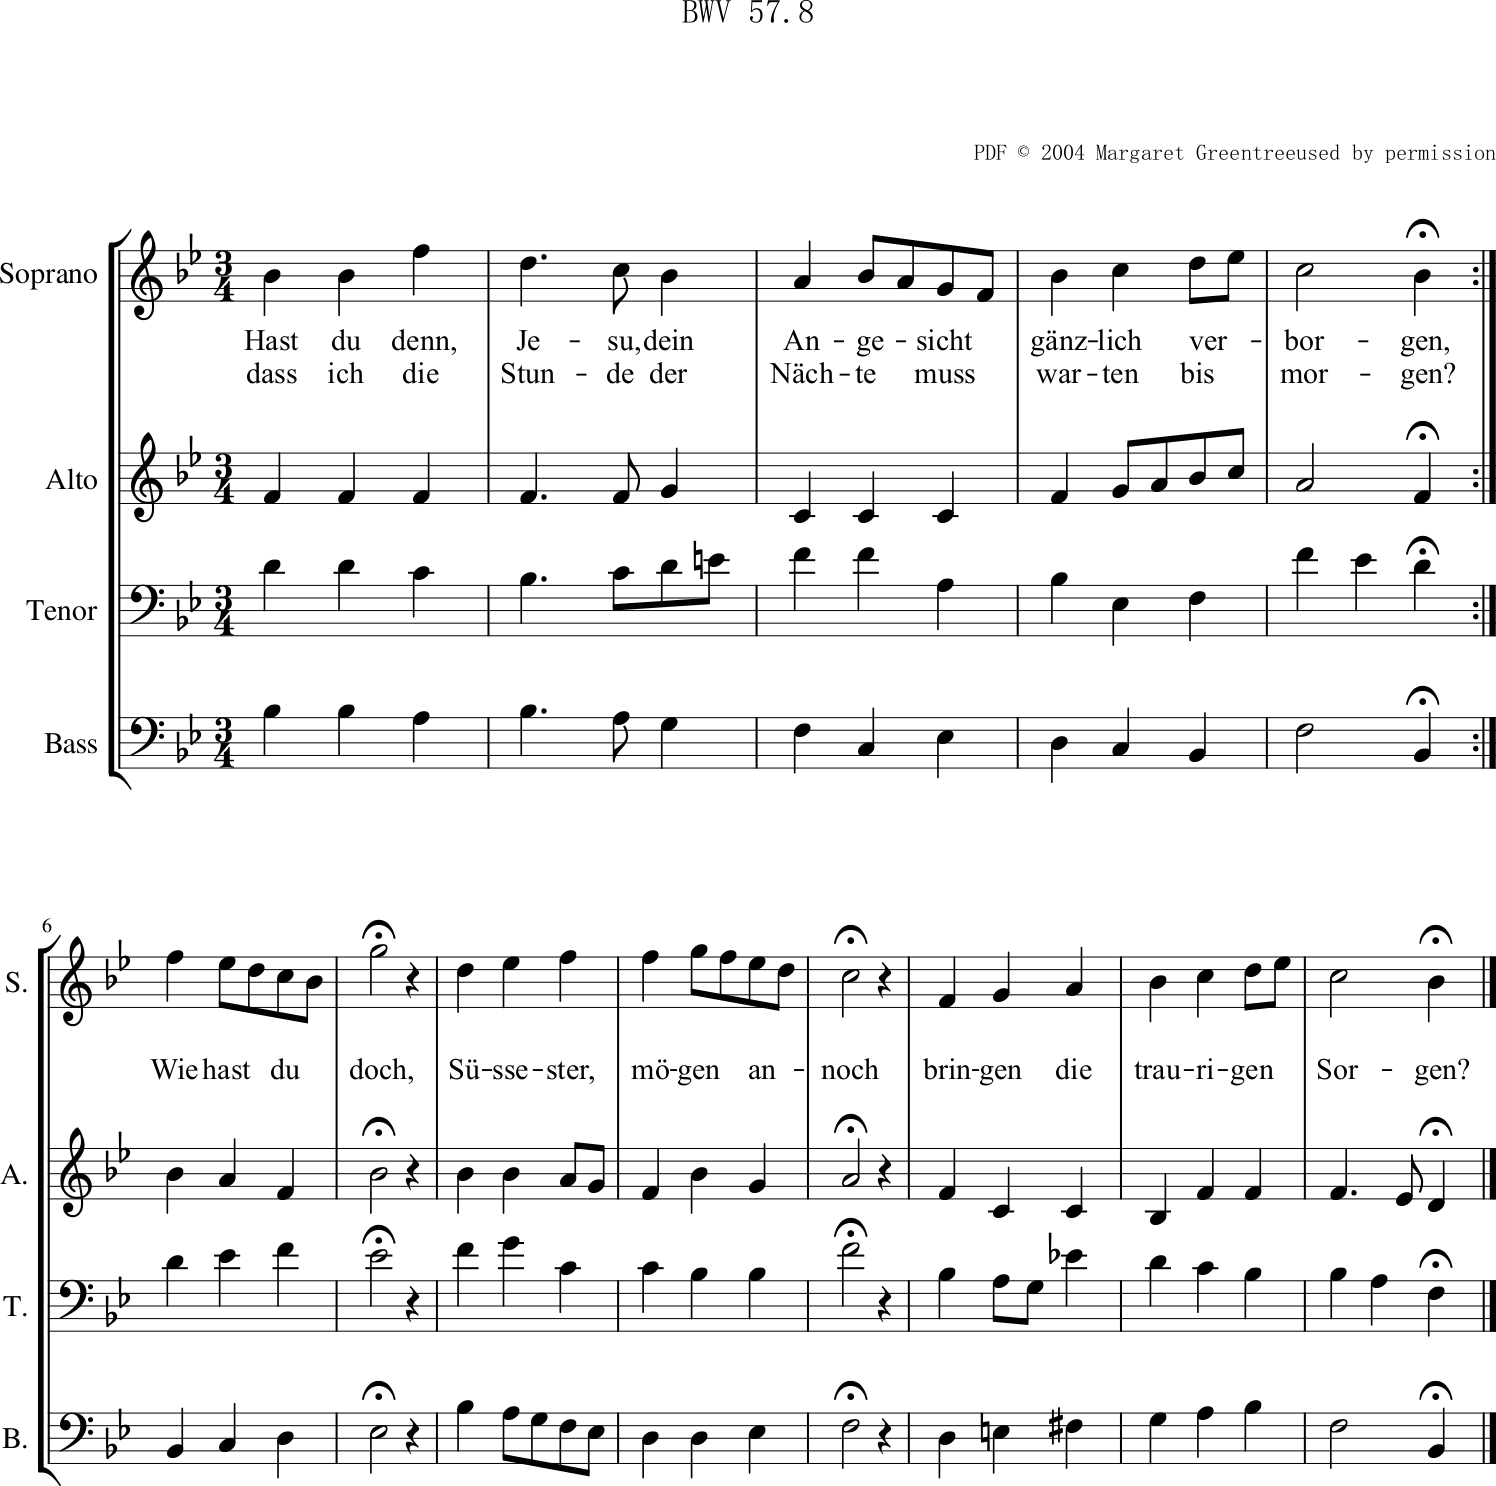

In [7]:
sBach = corpus.parse('bach/bwv57.8')
sBach.show()

我们可以使用标准Python语法对列表中的列表进行访问，我们可以访问和检查此Score各个级别的元素。因此，我们可以看到每个组件的长度：首先是具有六个元素的Score：一个Metadata对象，一个 StaffGroup对象和四个 Part对象。然后，我们在索引3处找到第一部分的长度，该长度指示14个对象（其中13个是小节）。

然后在该部分中，我们在索引1处找到一个对象（度量）。所有这些子程序都可以通过查看同一得分对象来访问sBach。

In [8]:
len(sBach)

9

In [9]:
len(sBach[3])

14

In [10]:
len(sBach[3][1])

7

但是我们怎么知道索引[3]是一个Part，索引[1] [1]是measure(小节)？正如我们上面提到的，Part对象（例如， Instrument对象）中不仅可以存储Measures ，并且Measures也不仅可以存储Note和Rest对象(还有TimeSignature 和 KeySignature 对象)。因此，按照类的方式过滤Stream和Stream子类要安全得多。

要重复计数并选择特定的类，我们可以使用第4章中的getElementsByClass()方法。

In [11]:
len(sBach.getElementsByClass(stream.Part))

4

In [12]:
len(sBach.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure))

13

In [13]:
len(sBach.getElementsByClass(stream.Part)[0].getElementsByClass(
        stream.Measure)[1].getElementsByClass(note.Note))

3

回想一下第4章，getElementsByClass()方法还可以采用类名最后一部分的字符串来进行查找。因此，我们可以将上面的第一个调用重写为：

In [14]:
len(sBach.getElementsByClass('Part'))

4

这种处理方式的编码速度更快，但安全性稍差一些。例如，假设有类型为stream.Measure和的对象 tape.Measure；后一种编写代码的方式将同时获得它们。（但这种情况很少见，因此大多数时候使用字符串的方式是很安全的。）

当我们介绍.getElementsByClass()时，我们还介绍了更方便的成员属性.notes和.notesAndRests。这里再引入一个成员属性，用于取出章节数：

In [15]:
len(sBach.parts)

4

您可能会认为应该有一个成员属性.measures来获取所有measuer。但是，这样做的问题是这样做的measuer的编号将与索引编号完全不同。例如，大多数片段（无起始小节）会从小节1开始，而不是零。有时，一个片段中存在小节不连续性（比如有人用相同的小节号当做第一和次和第二次的结束小节）。出于这个原因，最好的方式就是不要设计getElementsByClass(stream.Measure)，而是直接使用measures()方法（返回Part或者Measure的流）或 measure()方法（返回一个Measure）。

这些是方法，而不是属性，因此它们使用()调用。让我们看看如何使用它们：

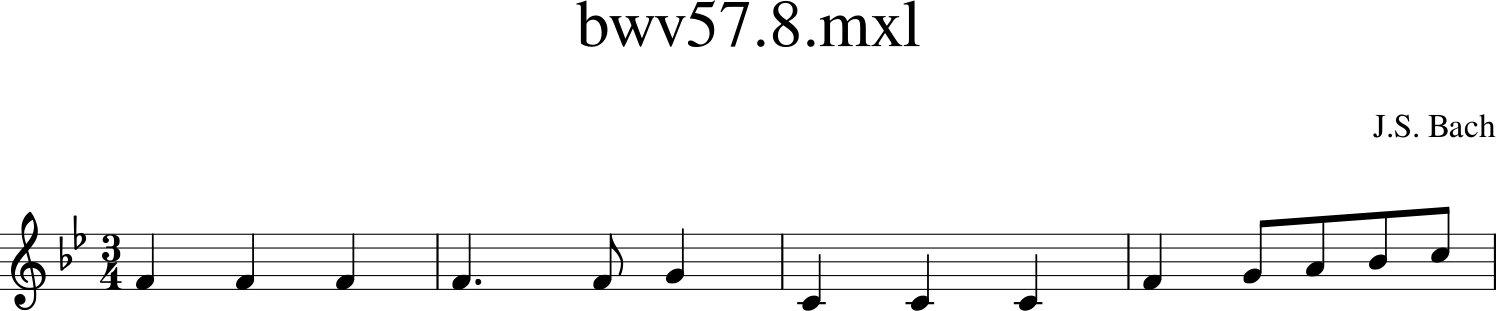

In [16]:
alto = sBach.parts[1] # parts的编号从0开始
excerpt = alto.measures(1,4)# 小节一般都从1开始计数
excerpt.show()

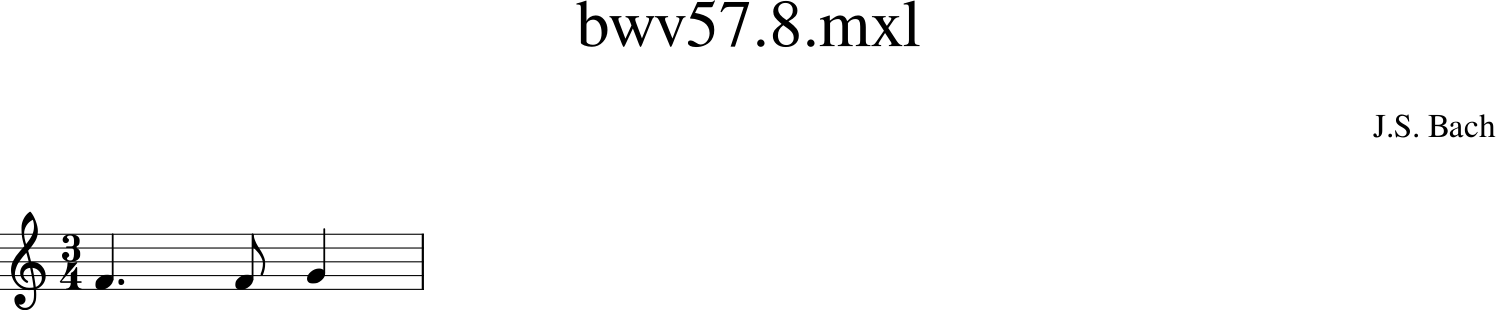

In [17]:
measure2 = alto.measure(2) # 是measure不是measures
measure2.show()

.measure()和.measures()还有一点好处在于，他们不止可以对谱子的每一段进行处理，还可以在整个谱子上起到作用。有时，计算音乐学家和程序员将这些竖着堆叠的小节称为“ measureStack”。因此，就让我们看看下标从2到3的measureStack：

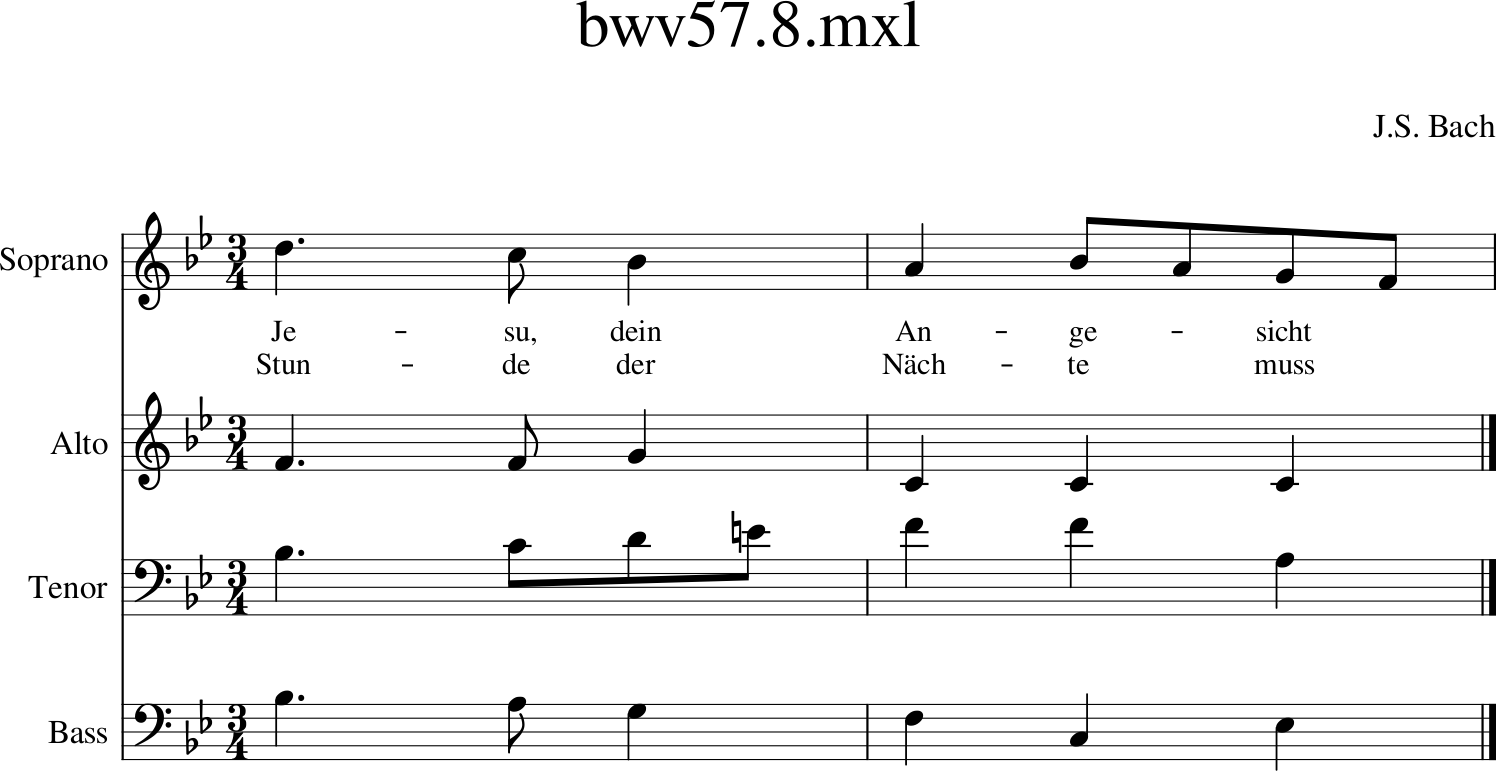

In [18]:
measureStack = sBach.measures(2, 3)
measureStack.show()

### Stream中的递归
Streams是层次结构对象，其中包含的元素可以是同为Streams类型的对象。为了到达流的每个较低层层级，流内置的recurse()方法将从头开始访问流中的每个元素，并且如果发现它的子元素也是流，则它们将访问该流中的每个元素。

让我们创建一个简单的Stream来看看.recurse()可以做什么。

In [19]:
s = stream.Score(id='mainScore')
p0 = stream.Part(id='part0')
p1 = stream.Part(id='part1')

m01 = stream.Measure(number=1)
m01.append(note.Note('C', type="whole"))
m02 = stream.Measure(number=2)
m02.append(note.Note('D', type="whole"))
p0.append([m01, m02])

m11 = stream.Measure(number=1)
m11.append(note.Note('E', type="whole"))
m12 = stream.Measure(number=2)
m12.append(note.Note('F', type="whole"))
p1.append([m11, m12])

s.insert(0, p0)
s.insert(0, p1)
s.show('text')

{0.0} <music21.stream.Part part0>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note C>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note D>
{0.0} <music21.stream.Part part1>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note E>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note F>


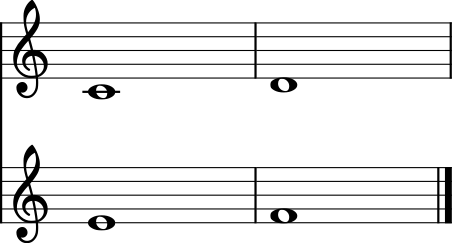

In [43]:
s.show()
s.show('midi')

单独调用`.recurse()`无法得到什么有用的信息。

In [21]:
recurseScore = s.recurse()
recurseScore

<music21.stream.iterator.RecursiveIterator for Score:mainScore @:0>

通过for循环来得到里面的信息

In [22]:
for el in s.recurse():
    print(el.offset, el, el.activeSite)

0.0 <music21.stream.Part part0> <music21.stream.Score mainScore>
0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part part0>
0.0 <music21.note.Note C> <music21.stream.Measure 1 offset=0.0>
4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part part0>
0.0 <music21.note.Note D> <music21.stream.Measure 2 offset=4.0>
0.0 <music21.stream.Part part1> <music21.stream.Score mainScore>
0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part part1>
0.0 <music21.note.Note E> <music21.stream.Measure 1 offset=0.0>
4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part part1>
0.0 <music21.note.Note F> <music21.stream.Measure 2 offset=4.0>


这个示例还引入了新的概念.activeSite，可以将其理解成元素所在的Stream，即其父流；尽管我们会发现Notes和其他元素可以同时存在于多个Stream中，但这只是它们最近与最近的父流又关联。

我们可以用.recurse()做很多事情，但现在我们只介绍一件事。他更多被用来执行“过滤”机制（例如.notes也可以在`recurse()` 和for循环末尾的`:` 之间应用）。

In [23]:
for el in s.recurse().notes:
    print(el.offset, el, el.activeSite)

0.0 <music21.note.Note C> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.note.Note D> <music21.stream.Measure 2 offset=4.0>
0.0 <music21.note.Note E> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.note.Note F> <music21.stream.Measure 2 offset=4.0>


.recurse（）自v2.0.10起是生成器。因此，它只能用于循环遍历列表的每个成员的循环中。要将.recurse（）的结果视为列表，您需要将其包装

In [24]:
listRecurse = list(sBach.recurse())

通常，这.recurse()是处理Stream的所有元素的最佳方法，但是在某些情况下还有另一种方便的方法，称为`.flat`。
### 展平流
尽管嵌套的Stream提供了表达灵活性，但是将混合了好多个steam的流展平为仅包含非Stream类元素的单个流通常很有用。flat属性可以实现这种展开流的操作。例如，像上面显示的那样，对组件进行类似的计数，我们看到只有通过访问flat属性展平其Part和Measure对象，才能获取整个Score的所有Note对象。请注意，由于历史原因，.flat是属性，因此请勿在它周围使用() 。

让我们看一下.flat对我们创建的示例score有何影响。

In [25]:
for el in s.flat:
    print(el.offset, el, el.activeSite)

0.0 <music21.note.Note C> <music21.stream.Score mainScore_flat>
0.0 <music21.note.Note E> <music21.stream.Score mainScore_flat>
4.0 <music21.note.Note D> <music21.stream.Score mainScore_flat>
4.0 <music21.note.Note F> <music21.stream.Score mainScore_flat>


一个新的，名为mainScore_flat的流被创建了，并且所有Note对象都在其中。我们不需要对Note进行过滤，.flat会自动删除所有Stream对象，这样一来就只剩下Note对象了。

现在所有Note对象都在新的临时mainScore_flat对象中，并且它们的偏移量(offsite)不再是all 0.0，而是从已经展平的score的起点开始测量。因此，在第二小节的每个音符都具有4.0的偏移量。

对比一下，看看.flat在面对更大的score的时候您可以做什么。

我们可以看到sBach中没有Note对象...

In [26]:
len(sBach.getElementsByClass(note.Note))

0

…它们都在score内部的"小节"内部。（在更复杂的分数中，它们可能位于声部内部的小节内部的“Voice”中，等等）。但是它们都会出现在flat后的流之中：

In [27]:
len(sBach.flat.getElementsByClass(note.Note))

150

元素偏移量总是相对于包含它们的流来计算的。例如，当一个小节放在流中时，其偏移量可能为16。此偏移量描述了小节在流中的位置。该小节的组件（例如“Note”）仅具有相对于其容器“小节”的偏移值。这样，该小节的第一个音符的偏移量为0。在下面的示例中，我们发现第8小节的偏移量为21（使用getOffsetBySite()方法）；而该小节中第二个Note的偏移量（索引为1）为1。

In [28]:
m = sBach.parts[0].getElementsByClass('Measure')[7]
m.getOffsetBySite(sBach.parts[0])

21.0

In [29]:
n = sBach.parts[0].measure(8).notes[1]
n

<music21.note.Note E->

In [33]:
n.getOffsetBySite(m)

1.0

展平嵌套的Streams将为临时Stream上的每个元素设置新的偏移量，以反映它们在临时Stream中的适当位置。例如，如果将巴赫合唱曲第一部分进行flat化，则上面我们所定义的音符n的偏移量就变成了22（小节偏移量为21加此小节内的音符偏移量为1）。

In [38]:
pFlat = sBach.parts[0].flat
indexN = pFlat.index(n)
pFlat[indexN]

<music21.note.Note E->

In [39]:
pFlat[indexN].offset 

22.0

顺便说一句，你需要意识到到Note的偏移量没有被编辑。相反，包括Note在内的所有Music21的对象可以存储相对不同流的偏移量。Music21中所有流以及流的子类都会对他们所包含的对象计算offset，即使只是临时出现的。

关于Streams还有很多要学习的东西，但是我们以后可以做。现在，让我们继续 第7章：和弦。

In [42]:
m.show('midi')